# Классификация заемщиков линейными моделями

## Студент: Азиз Латыпов

## Формулировка задания
Данное задание направлено на ознакомление с линейными моделями.

От вас требуется:
1. Загрузить данные
2. Провести первичный анализ данных, изучить имеющиеся признаки
3. Провести обработку данных и обучить простую линейную модель
4. С помощью кросс-валидации + GridSearch подобрать основные параметры для линейной модели. Провести простой отбор признаков
5. Посмотреть как изменение остальных параметров влияет на метрики
6. Оценить качество полученной модели

## 1. Загрузка данных (5 баллов)

Эксперименты будем проводить на [датасете](https://www.kaggle.com/competitions/home-credit-default-risk/overview) по классификации заемщиков на плохих (target = 1: клиент с "payment difficulties") и хороших (target = 0: все остальные). Для экспериментов будем использовать лишь основной файл `application_train.csv`, а также перекодируем таргет в метки -1, 1.

Описание колонок находится в файле `description.csv`.

Для начала мы за вас считаем данные и поделим на обучение, валидацию и тест случайным образом.

In [1]:
!unzip data/application_train.zip

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [2]:
import numpy as np, pandas as pd

data = pd.read_csv('application_train.csv')
data.columns = ['_'.join([word.lower() for word in col_name.split(' ') if word != '-']) for col_name in data.columns]

data.target = data.target.map({0: -1, 1: 1})

from IPython.display import display

print('\ntarget value_counts:')
display(data['target'].value_counts(dropna=False))

pd.options.display.max_columns = 100
pd.options.display.max_rows = 150

data.head(3)


target value_counts:


-1    282686
 1     24825
Name: target, dtype: int64

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,...,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,-1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,-1,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data.describe()

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,...,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,totalarea_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,-0.838542,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.00019

In [5]:
data.isnull().sum()

sk_id_curr                           0
target                               0
name_contract_type                   0
code_gender                          0
flag_own_car                         0
flag_own_realty                      0
cnt_children                         0
amt_income_total                     0
amt_credit                           0
amt_annuity                         12
amt_goods_price                    278
name_type_suite                   1292
name_income_type                     0
name_education_type                  0
name_family_status                   0
name_housing_type                    0
region_population_relative           0
days_birth                           0
days_employed                        0
days_registration                    0
days_id_publish                      0
own_car_age                     202929
flag_mobil                           0
flag_emp_phone                       0
flag_work_phone                      0
flag_cont_mobile         

### Мы видим, что количество пустых значений слишком велико для удаления этих значений, поэтому попробуем заполнить их модой.

In [6]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].mode()[0])


## 2. Первичный анализ данных, изучение признаков (5 баллов)

Изучите признаки, которые имеются в датасете.  
Какие из них относятся к каким типам?

Как они коррелируют с целевой переменной?

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, sk_id_curr to amt_req_credit_bureau_year
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### 122- колонки:
65-типа с плавающей запятой

41-целочисленные

16-объект(строки)

Следовательно, 106 колонок-numerical , 16-categorical

In [8]:
df_cor=data.corr()

In [9]:
df_cor.target

sk_id_curr                     -0.002108
target                          1.000000
cnt_children                    0.019187
amt_income_total               -0.003982
amt_credit                     -0.030369
amt_annuity                    -0.012802
amt_goods_price                -0.039623
region_population_relative     -0.037227
days_birth                      0.078239
days_employed                  -0.044932
days_registration               0.041975
days_id_publish                 0.051457
own_car_age                     0.012626
flag_mobil                      0.000534
flag_emp_phone                  0.045982
flag_work_phone                 0.028524
flag_cont_mobile                0.000370
flag_phone                     -0.023806
flag_email                     -0.001758
cnt_fam_members                 0.009308
region_rating_client            0.058899
region_rating_client_w_city     0.060893
hour_appr_process_start        -0.024166
reg_region_not_live_region      0.005576
reg_region_not_w

In [10]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

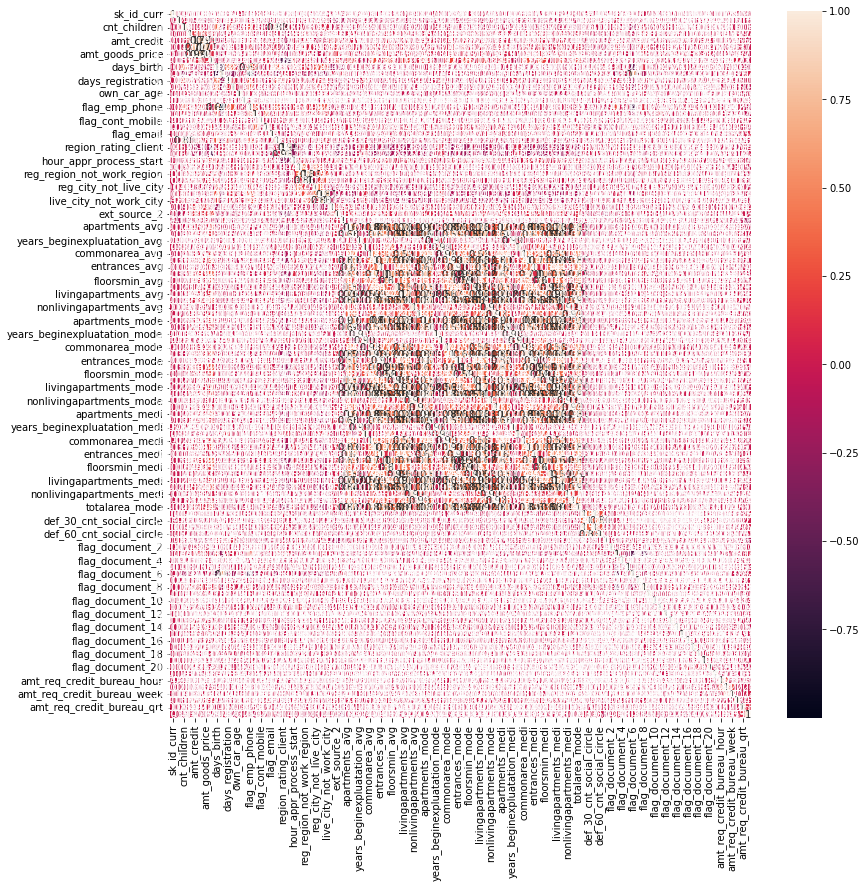

In [11]:
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(data.corr(method='pearson'), annot=True)

### Благодаря проведенному анализу, мы смогли выявить недочеты в нашем датасете, которые хорошо было бы исправить. Чем мы собственно и займемся ниже

### Подготовим названия колонок для будущего датасета

In [12]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
ord_data=data.copy()
ord_data[ord_data.select_dtypes(include='object').columns]=enc.fit_transform(ord_data[ord_data.select_dtypes(include='object').columns])

## Оставим лишь те колонки, в которых варианс больше 0.01

In [13]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
sel = selector.fit(ord_data)
sel_index = sel.get_support()
data1 = ord_data.iloc[:, sel_index]
print(len(data1.columns))

62


### Отскалируем все данные кроме целевых от 0 до 2

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,2))
data1=data1.drop('target',axis=1)
scaler.fit(data1)
new_data=pd.DataFrame(scaler.transform(data1),columns=data1.columns)
new_data['target']=data.target

## Оставим лишь самые релевантные 20 фичей

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(score_func=chi2, k=20)

selector.fit(new_data.drop('target',axis=1),new_data.target)

vector_names = list(new_data.columns[selector.get_support(indices=True)])
print(vector_names)

['name_contract_type', 'code_gender', 'name_income_type', 'name_education_type', 'days_birth', 'days_employed', 'flag_emp_phone', 'flag_work_phone', 'flag_phone', 'region_rating_client', 'region_rating_client_w_city', 'reg_city_not_live_city', 'reg_city_not_work_city', 'live_city_not_work_city', 'ext_source_1', 'ext_source_2', 'ext_source_3', 'elevators_avg', 'flag_document_3', 'flag_document_6']


In [16]:
df=new_data[vector_names]
df['target']=new_data.target

### Теперь мы с чистой совестью можем приступить к следующему шагу


# Разбейте вашу выборку на трейн-тест-валидацию в пропорциях 0.5-0.2-0.3 соответственно

In [17]:
from sklearn.model_selection import train_test_split
'''from sklearn.model_selection import train_test_split

train_ratio = 0.5
test_ratio = 0.2
validation_ratio = 0.3

x_train, x_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df.target, test_size=1 - train_ratio, random_state=69)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, 
                                                test_size=test_ratio/(test_ratio + validation_ratio))'''

#так как в группе написали обновлении по валидационной подвыборки, объединю её с тренировочной и использую в кросс-валидацию

x_train, x_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df.target, test_size=0.8, random_state=69)


## 3. Обработка данных, обучение простой линейной модели  (5 баллов)

Изучите признаки, которые имеются в датасете.  
Какие из них относятся к каким типам?
Как они коррелируют с целевой переменной?
Обучите на ваших данных простую [Логистическую регресиию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)   
Какое качество вам удалось получить?


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)

y_pred=pd.Series(np.array(y_pred,dtype='int8'))
y_pred.unique()

array([-1,  1], dtype=int8)

In [20]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)

Accuracy Score: 0.9187793942498038


### Использовав логистическую регрессию с дефолтными параметрами мы получили точность равную почти 92%

## Выведем корреляцию каждого признака с таргетом

In [21]:
log.coef_[0]

array([-0.09047244,  0.25235051,  0.05970824,  0.247353  ,  0.13091595,
        2.58223419,  2.57507923,  0.0817184 , -0.04896873,  0.00355484,
        0.13231071,  0.11297109, -0.01232081,  0.02133323, -0.72104642,
       -0.99704401, -0.86908443, -0.18669551,  0.13579316,  0.0077252 ])

In [22]:
coefficients = log.coef_[0]

feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': coefficients})

feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)


feature_importance

,Feature,Coefficient,Absolute Coefficient
5,days_employed,2.582234,2.582234
6,flag_emp_phone,2.575079,2.575079
15,ext_source_2,-0.997044,0.997044
16,ext_source_3,-0.869084,0.869084
14,ext_source_1,-0.721046,0.721046
1,code_gender,0.252351,0.252351
3,name_education_type,0.247353,0.247353
17,elevators_avg,-0.186696,0.186696
18,flag_document_3,0.135793,0.135793
10,region_rating_client_w_city,0.132311,0.132311


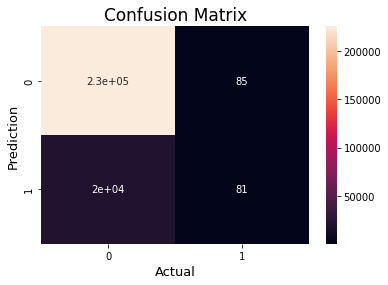

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
 
sns.heatmap(cm, annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)

plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [24]:
cm

array([[225947,     85],
       [ 19896,     81]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
default_logreg=classification_report(y_test, y_pred)
print(default_logreg)

              precision    recall  f1-score   support

          -1       0.92      1.00      0.96    226032
           1       0.49      0.00      0.01     19977

    accuracy                           0.92    246009
   macro avg       0.70      0.50      0.48    246009
weighted avg       0.88      0.92      0.88    246009



# Recall is 0, which means that our model cannot correctly predict the 1s-clients with payment difficulties

In [26]:
display(y_pred.value_counts(dropna=False))

-1    245843
 1       166
dtype: int64

In [27]:
display(y_test.value_counts(dropna=False))

-1    226032
 1     19977
Name: target, dtype: int64

### Благодаря проведенным выше метрикам мы смогли выявить проблему в датасете и поняли, что он не сбалансирован.

In [28]:
df.target.value_counts()

-1    282686
 1     24825
Name: target, dtype: int64

### Количество классов разнится в 10 раз!
    -1    92%
     1     8%

Попробуем настроить веса

In [29]:
log=LogisticRegression(class_weight={-1:0.08,1:0.92})
log.fit(x_train,y_train)
y_pred=log.predict(x_test)

y_pred=pd.Series(np.array(y_pred,dtype='int8'))
y_pred.unique()

array([ 1, -1], dtype=int8)

In [30]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.2448540500043223

In [31]:
default_logreg_weighted=classification_report(y_test, y_pred)
print(default_logreg_weighted)

              precision    recall  f1-score   support

          -1       0.96      0.68      0.80    226032
           1       0.15      0.64      0.24     19977

    accuracy                           0.68    246009
   macro avg       0.55      0.66      0.52    246009
weighted avg       0.89      0.68      0.75    246009



In [32]:
confusion_matrix(y_test, y_pred)

array([[154644,  71388],
       [  7231,  12746]], dtype=int64)

In [33]:
accuracy_score(y_test, y_pred)

0.680422260974192

### Попробуем технику андерсемплинга

In [34]:
from sklearn.utils import resample

df1 = pd.concat([x_train, y_train], axis=1)

df_majority = df1[df1.target==-1]
df_minority = df1[df1.target==1]
 
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=len(df_minority), 
                                 random_state=69) 
 
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
df_downsampled.target.value_counts()

-1    4848
 1    4848
Name: target, dtype: int64

In [35]:
log=LogisticRegression()

log.fit(df_downsampled.drop('target',axis=1),df_downsampled.target)
y_pred=log.predict(x_test)

y_pred=pd.Series(np.array(y_pred,dtype='int8'))

score = accuracy_score(y_test, y_pred)
print("Accuracy score", score)

Accuracy score 0.6750606685121276


In [36]:
undersample=classification_report(y_test, y_pred)
print(undersample)

              precision    recall  f1-score   support

          -1       0.96      0.68      0.79    226032
           1       0.15      0.65      0.24     19977

    accuracy                           0.68    246009
   macro avg       0.55      0.66      0.52    246009
weighted avg       0.89      0.68      0.75    246009



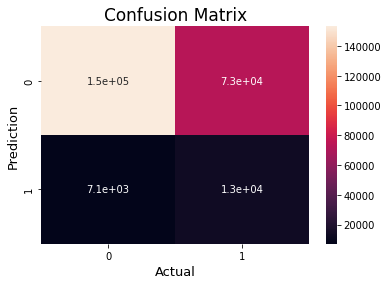

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
 
sns.heatmap(cm, annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)

plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [38]:
cm

array([[153164,  72868],
       [  7070,  12907]], dtype=int64)

### Пример оверсемплинга

In [39]:
df1 = pd.concat([x_train, y_train], axis=1)

df_majority = df1[df1.target==-1]
df_minority = df1[df1.target==1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority),
                                 random_state=69)
 
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
df_upsampled.target.value_counts()

-1    56654
 1    56654
Name: target, dtype: int64

In [40]:
log=LogisticRegression()

log.fit(df_upsampled.drop('target',axis=1),df_upsampled.target)
y_pred=log.predict(x_test)

y_pred=pd.Series(np.array(y_pred,dtype='int8'))

score = accuracy_score(y_test, y_pred)
print("Accuracy score", score)

Accuracy score 0.6760972159555139


In [41]:
oversample=classification_report(y_test, y_pred)
print(oversample)

              precision    recall  f1-score   support

          -1       0.96      0.68      0.79    226032
           1       0.15      0.65      0.25     19977

    accuracy                           0.68    246009
   macro avg       0.55      0.66      0.52    246009
weighted avg       0.89      0.68      0.75    246009



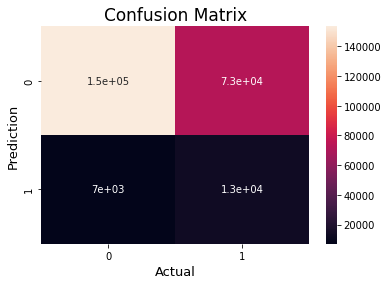

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
 
sns.heatmap(cm, annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)

plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [43]:
cm

array([[153374,  72658],
       [  7025,  12952]], dtype=int64)

## В обоих кейсах, мы получили что-то в районе 67%. Попробуем с помощью тюнинга параметров, улучшить одну из моделей.


## 4. Оценка поведения модели в зависимости от гиперпараметров  (5 баллов)

Попробуйте поперебирать значения гиперпараметров `l2_coef, batch_size`.   
Какая их комбинация выглядит оптимальной?




#### В случае Логистической регресси `l2_coef=penalty`, a `batch_size=max_iter`

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {  
    'penalty': ['l2'],  
    'max_iter':[1,10,100,1000,10000,100000]
}

grid_search = GridSearchCV(log, param_grid, cv=5, n_jobs=-1,scoring='f1')

grid_search.fit(df.drop('target',axis=1),df.target)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
print("Test accuracy with best model:", f1_score(y_pred,y_test))

Best hyperparameters: {'max_iter': 1000, 'penalty': 'l2'}
Best cross-validation score: 0.007195411892198062
Test accuracy with best model: 0.00774962742175857



## 5. GridSearchCV. Отбор признаков  (5 баллов)


С помощью GridSearchCV подберите оптимальные параметры `step_alpha, step_beta` для фиксированных значений `l2_coef, batch_size` с предыдущего шага.  
Проведите отбор признаков любым из известных вам методов

#### Вместо `step_alpha` я воспользуюсь параметром `C`, a вместо `step_beta`-`class_weight`

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': [grid_search.best_params_['penalty']],  
    'max_iter':[grid_search.best_params_['max_iter']],
    'C': [0.001,0.1,1,10,100,1000],  
    'class_weight':[{ -1:0.3, 1:0.7 },
        { -1:0.2, 1:0.8 },
        { -1:0.08, 1:0.92 },
        {-1:0.06,1:0.94}]
}

grid_search = GridSearchCV(log, param_grid, cv=5, n_jobs=-1,scoring='f1')

grid_search.fit(df.drop('target',axis=1),df.target)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
print("Test accuracy with best model:", f1_score(y_pred,y_test))

Best hyperparameters: {'C': 1000, 'class_weight': {-1: 0.08, 1: 0.92}, 'max_iter': 1000, 'penalty': 'l2'}
Best cross-validation score: 0.24389799527449169
Test accuracy with best model: 0.2444100558762753


In [46]:
cm

array([[153374,  72658],
       [  7025,  12952]], dtype=int64)

In [47]:
hyperptune=classification_report(y_test, y_pred)
print(hyperptune)

              precision    recall  f1-score   support

          -1       0.96      0.67      0.79    226032
           1       0.15      0.66      0.24     19977

    accuracy                           0.67    246009
   macro avg       0.55      0.66      0.52    246009
weighted avg       0.89      0.67      0.74    246009



## Перебрав разные параметры с помощью кросс-валидации мы получили лучшую модель с почти таким же показателем как и у дефолтной модели с весами


## 6. Оценка качества модели  (5 баллов)


Оцените качество модели с помощью известных вам метрик классификации.  
Что ещё в модели можно было бы улучшить?


# Логистическая регрессия с дефолтными параметрами:

In [48]:
print(default_logreg)

              precision    recall  f1-score   support

          -1       0.92      1.00      0.96    226032
           1       0.49      0.00      0.01     19977

    accuracy                           0.92    246009
   macro avg       0.70      0.50      0.48    246009
weighted avg       0.88      0.92      0.88    246009



# Логистическая регрессия с весами (10:125):

In [49]:
print(default_logreg_weighted)

              precision    recall  f1-score   support

          -1       0.96      0.68      0.80    226032
           1       0.15      0.64      0.24     19977

    accuracy                           0.68    246009
   macro avg       0.55      0.66      0.52    246009
weighted avg       0.89      0.68      0.75    246009



# Логистическая регрессия с дефолтными параметрами на уменьшенных датасетах:

## Undersampling:

In [50]:
print(undersample)

              precision    recall  f1-score   support

          -1       0.96      0.68      0.79    226032
           1       0.15      0.65      0.24     19977

    accuracy                           0.68    246009
   macro avg       0.55      0.66      0.52    246009
weighted avg       0.89      0.68      0.75    246009



## Oversampling

In [51]:
print(oversample)

              precision    recall  f1-score   support

          -1       0.96      0.68      0.79    226032
           1       0.15      0.65      0.25     19977

    accuracy                           0.68    246009
   macro avg       0.55      0.66      0.52    246009
weighted avg       0.89      0.68      0.75    246009



## Support Vector Classifier

In [52]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

y_pred=svc.predict(x_test)

svc_report=classification_report(y_pred,y_test)
print(svc_report)
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

          -1       1.00      0.92      0.96    246009
           1       0.00      0.00      0.00         0

    accuracy                           0.92    246009
   macro avg       0.50      0.46      0.48    246009
weighted avg       1.00      0.92      0.96    246009



array([[226032,  19977],
       [     0,      0]], dtype=int64)

### К сожалению, ядра с дефолтными параметрами совсем не справились с поставленной задачей

In [53]:
'''param_grid = {
    'C': [0.001, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

svc = SVC()

grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1,scoring='f1')

grid_search.fit(x_train,y_train)

print("Best hyperparameters found:")
print(grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))'''
#Если у вас достаточно мощный компьютер, 
#то можете попробовать пройтись по гиперпараметрам и выбить что-то ближе к приемлемому 

'param_grid = {\n    \'C\': [0.001, 0.1, 1, 10, 100, 1000],\n    \'gamma\': [0.001, 0.01, 0.1, 1, 10, 100],\n    \'kernel\': [\'rbf\', \'linear\', \'poly\', \'sigmoid\']\n}\n\nsvc = SVC()\n\ngrid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1,scoring=\'f1\')\n\ngrid_search.fit(x_train,y_train)\n\nprint("Best hyperparameters found:")\nprint(grid_search.best_params_)\nprint("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))'

## Попробуем немного поиграться и с другими моделями. В интернете например пишут, что деревья отлично справляются с не сбалансированными датасетами

In [54]:
data = pd.read_csv('application_train.csv')
data.columns = ['_'.join([word.lower() for word in col_name.split(' ') if word != '-']) for col_name in data.columns]

data.target = data.target.map({0: -1, 1: 1})

In [55]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [56]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder(handle_unknown='ignore', sparse=False)

In [57]:
one_hot_encoded_data = pd.get_dummies(data, columns = data.select_dtypes(include=['object']).columns.tolist()) 

In [58]:
one_hot_encoded_data

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,...,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,organization_type_Self-employed,organization_type_Services,organization_type_Telecom,organization_type_Trade: type 1,organization_type_Trade: type 2,organization_type_Trade: type 3,organization_type_Trade: type 4,organization_type_Trade: type 5,organization_type_Trade: type 6,organization_type_Trade: type 7,organization_type_Transport: type 1,organization_type_Transport: type 2,organization_type_Transport: type 3,organization_type_Transport: type 4,organization_type_University,organization_type_XNA,fondkapremont_mode_not specified,fondkapremont_mode_org spec account,fondkapremont_mode_reg oper account,fondkapremont_mode_reg oper spec account,housetype_mode_block of flats,housetype_mode_specific housing,housetype_mode_terraced house,wallsmaterial_mode_Block,wallsmaterial_mode_Mixed,wallsmaterial_mode_Monolithic,wallsmaterial_mode_Others,wallsmaterial_mode_Panel,"wallsmaterial_mode_Stone, brick",wallsmaterial_mode_Wooden,emergencystate_mode_No,emergencystate_mode_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,7.0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
1,100003,-1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,7.0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.746300,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,100004,-1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.356323,0.555912,0.729567,0.0825,0.0000,0.9871,0.8232,0.0000,0.00,0.1379,0.1667,0.2083,0.0000,0.0504,0.0000,0.0000,0.0000,0.0840,0.0000,0.9871,0.8301,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
3,100006,-1,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,7.0,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.356323,0.650442,0.746300,0.0825,0.0000,0.9871,0.8232,0.0000,0.00,0.1379,0.1667,0.2083,0.0000,0.0504,0.0000,0.0000,0.0000,0.0840,0.0000,0.9871,0.8301,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
4,100007,-1,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,7.0,1,1,0,1,0,0,1.0,2,2,11,0,0,0,

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,2))
one_hot_encoded_data=one_hot_encoded_data.drop('target',axis=1)
scaler.fit(one_hot_encoded_data)
new_data=pd.DataFrame(scaler.transform(one_hot_encoded_data),columns=one_hot_encoded_data.columns)
new_data['target']=data.target

In [60]:
x_train, x_test, y_train, y_test = train_test_split(new_data.drop('target',axis=1), 
                                                    new_data.target, test_size=0.8, random_state=69)

In [61]:
y_train

117262   -1
134621   -1
48860    -1
127706   -1
252056   -1
         ..
122252   -1
210104    1
299286   -1
25015    -1
140890   -1
Name: target, Length: 61502, dtype: int64

## Decision Tree

In [62]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=69)

tree.fit(x_train,y_train)

y_pred=tree.predict(x_test)

tree_report=classification_report(y_pred,y_test)
print(tree_report)

confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

          -1       0.91      0.92      0.92    223770
           1       0.15      0.13      0.14     22239

    accuracy                           0.85    246009
   macro avg       0.53      0.53      0.53    246009
weighted avg       0.85      0.85      0.85    246009



array([[206784,  16986],
       [ 19248,   2991]], dtype=int64)

In [63]:
accuracy_score(y_pred,y_test)

0.8527127056327207

In [64]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

importances = tree.feature_importances_

feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
29,ext_source_2,0.068272
30,ext_source_3,0.057775
9,days_registration,0.044510
0,sk_id_curr,0.043677
10,days_id_publish,0.042150
...,...,...
109,code_gender_XNA,0.000000
127,name_income_type_Unemployed,0.000000
121,name_income_type_Businessman,0.000000
12,flag_mobil,0.000000


## Decision Tree parameter tuning

In [65]:
from sklearn.model_selection import GridSearchCV
tree_classifier = DecisionTreeClassifier(random_state=69)

temp2=y_train.copy()
temp2[y_train==-1]=0

temp=y_test.copy()
temp[y_test==-1]=0

param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter': ["best", "random"],
    'max_depth': [1, 3, 5, 10, 20, 30, 40],  
    'class_weight': [{0: 0.3, 1: 0.7},
                     {0: 0.2, 1: 0.8},
                     {0: 0.08, 1: 0.92},
                     {0: 0.06, 1: 0.94}],
}

grid_search = GridSearchCV(estimator=tree_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')

grid_search.fit(x_train,temp2)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
print("Test accuracy with best model:", accuracy_score(y_pred,temp))

Best hyperparameters: {'class_weight': {0: 0.2, 1: 0.8}, 'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
Best cross-validation score: 0.235781276108087
Test accuracy with best model: 0.8830367994666862


In [66]:
confusion_matrix(y_pred,temp)

array([[212971,  15713],
       [ 13061,   4264]], dtype=int64)

In [67]:
tree_cv=classification_report(temp, y_pred)
print(tree_cv)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94    226032
           1       0.25      0.21      0.23     19977

    accuracy                           0.88    246009
   macro avg       0.59      0.58      0.58    246009
weighted avg       0.88      0.88      0.88    246009



## Bagging (bootstrap aggregating)

In [68]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(random_state=69)

bag = BaggingClassifier(best_model, n_estimators=500, max_samples=0.8, random_state=69)

bag.fit(x_train, temp2)

y_pred=bag.predict(x_test)

default_bagging=(classification_report(y_pred,temp))

print(default_bagging)
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94    232373
           1       0.19      0.27      0.22     13636

    accuracy                           0.89    246009
   macro avg       0.57      0.60      0.58    246009
weighted avg       0.91      0.89      0.90    246009



array([[     0,      0,      0],
       [216109,      0,  16264],
       [  9923,      0,   3713]], dtype=int64)

In [69]:
accuracy_score(y_pred,y_test)

0.015092943754090298

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500,random_state=69)

rf.fit(x_train, y_train)

y_pred=rf.predict(x_test)

random_forest=classification_report(y_pred,y_test)

print(random_forest)
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

          -1       1.00      0.92      0.96    246003
           1       0.00      0.83      0.00         6

    accuracy                           0.92    246009
   macro avg       0.50      0.88      0.48    246009
weighted avg       1.00      0.92      0.96    246009



array([[226031,  19972],
       [     1,      5]], dtype=int64)

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

rd = GradientBoostingClassifier(n_estimators=500,random_state=69,)

rd.fit(x_train, y_train)

y_pred=rd.predict(x_test)

gbc=(classification_report(y_pred,y_test))

print(gbc)
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

          -1       1.00      0.92      0.96    244604
           1       0.03      0.44      0.06      1405

    accuracy                           0.92    246009
   macro avg       0.51      0.68      0.51    246009
weighted avg       0.99      0.92      0.95    246009



array([[225248,  19356],
       [   784,    621]], dtype=int64)

## XGBoost

In [72]:
import xgboost

temp2=y_train
temp2[y_train==-1]=0

temp=y_test
temp[y_test==-1]=0

xgb_clf = xgboost.XGBClassifier(obj='f1',random_state=42)
xgb_clf.fit(x_train, temp2, eval_set=[(x_test, temp)], early_stopping_rounds=10)

y_pred = xgb_clf.predict(x_test)

xgb_report=(classification_report(y_pred,y_test))

print(xgb_report)
print()
confusion_matrix(y_pred,y_test)

[16:29:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "obj" } are not used.

[0]	validation_0-logloss:0.50912
[1]	validation_0-logloss:0.41027
[2]	validation_0-logloss:0.35150
[3]	validation_0-logloss:0.31537
[4]	validation_0-logloss:0.29282
[5]	validation_0-logloss:0.27856
[6]	validation_0-logloss:0.26957
[7]	validation_0-logloss:0.26373
[8]	validation_0-logloss:0.26036
[9]	validation_0-logloss:0.25808
[10]	validation_0-logloss:0.25656
[11]	validation_0-logloss:0.25556
[12]	validation_0-logloss:0.25491
[13]	validation_0-logloss:0.25419
[14]	validation_0-logloss:0.25374
[15]	validation_0-logloss:0.25360
[16]	validation_0-logloss:0.25350
[17]	validation_0-logloss:0.25347
[18]	validation_0-logloss:0.25346
[19]	validation_0-logloss:0.25352
[20]	validation_0-logloss:0.25345
[21]	validation_0-logloss:0.25357
[22]	validation_0-logloss:0.25360
[23]	validation_0-logloss:0.25365
[

array([[225516,  19516],
       [   516,    461]], dtype=int64)

In [73]:
xgb_clf.get_booster().get_score(importance_type="gain")

{'sk_id_curr': 5.663285255432129,
 'cnt_children': 5.5609130859375,
 'amt_income_total': 7.276329517364502,
 'amt_credit': 8.267173767089844,
 'amt_annuity': 8.416604042053223,
 'amt_goods_price': 9.043384552001953,
 'region_population_relative': 5.581648349761963,
 'days_birth': 8.385807037353516,
 'days_employed': 8.087177276611328,
 'days_registration': 6.10526704788208,
 'days_id_publish': 6.381629467010498,
 'own_car_age': 6.685913562774658,
 'flag_work_phone': 10.358083724975586,
 'flag_phone': 7.4114508628845215,
 'flag_email': 2.589120388031006,
 'cnt_fam_members': 5.895942687988281,
 'region_rating_client': 7.557343482971191,
 'region_rating_client_w_city': 9.035734176635742,
 'hour_appr_process_start': 6.008345603942871,
 'reg_region_not_live_region': 5.615237236022949,
 'reg_region_not_work_region': 7.2331390380859375,
 'live_region_not_work_region': 4.55555534362793,
 'reg_city_not_live_city': 7.384253025054932,
 'reg_city_not_work_city': 6.371742248535156,
 'live_city_not_

In [75]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = xgboost.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [78]:
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV, GridSearchCV
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(x_train,y_train), verbose=3, random_state=1001 )

random_search.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[16:55:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002038CEE35A0>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=600, n_jobs=None,
                                           nthread=1, num_parallel_tree=None,
                                           predictor=None, ...),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [79]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 All results:
{'mean_fit_time': array([112.75055305, 196.33235566, 173.03301724, 119.4917384 ,
       166.14525477]), 'std_fit_time': array([0.40597337, 0.70800586, 0.43695224, 0.39436465, 2.50047523]), 'mean_score_time': array([0.23001115, 0.34637109, 0.33124542, 0.38167628, 0.24656073]), 'std_score_time': array([0.01345669, 0.01228622, 0.00975723, 0.03321339, 0.01984812]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?

In [83]:
y_pred=random_search.best_estimator_.predict(x_test)

xgb_cv_report=(classification_report(y_pred,y_test))

print(xgb_cv_report)
print()
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    245430
           1       0.02      0.57      0.03       579

    accuracy                           0.92    246009
   macro avg       0.51      0.74      0.49    246009
weighted avg       1.00      0.92      0.96    246009




array([[225783,  19647],
       [   249,    330]], dtype=int64)

### Коэффициент важности каждой из фичей для XGB:

## Пожалуй, хватит экспериментов с моделями. Давайте подытожим наши результаты:

In [80]:
print('\033[1m'+'Logistic Regression with default parameters:\n')
print('\033[0m',default_logreg)
print()

print('\033[1m'+'Logistic Regression with weights:\n')
print('\033[0m',default_logreg_weighted)
print()

print('\033[1m'+'Cross-Validated Logistic Regression:\n')
print('\033[0m',hyperptune)
print()

print('\033[1m'+'Logistic Regression trained on Oversampled dataset:\n')
print('\033[0m',oversample)
print()

print('\033[1m'+'Logistic Regression trained on Undersampled dataset:\n')
print('\033[0m',oversample)
print()

Logistic Regression with default parameters:

               precision    recall  f1-score   support

          -1       0.92      1.00      0.96    226032
           1       0.49      0.00      0.01     19977

    accuracy                           0.92    246009
   macro avg       0.70      0.50      0.48    246009
weighted avg       0.88      0.92      0.88    246009


Logistic Regression with weights:

               precision    recall  f1-score   support

          -1       0.96      0.68      0.80    226032
           1       0.15      0.64      0.24     19977

    accuracy                           0.68    246009
   macro avg       0.55      0.66      0.52    246009
weighted avg       0.89      0.68      0.75    246009


Cross-Validated Logistic Regression:

               precision    recall  f1-score   support

          -1       0.96      0.67      0.79    226032
           1       0.15      0.66      0.24     19977

    accuracy                           0.67    246009
   m

In [81]:
print('\033[1m'+'Decision Tree with default parameters:\n')
print('\033[0m',tree_report)
print()

print('\033[1m'+'Cross-Validated Decision Tree:\n')
print('\033[0m',tree_cv)
print()

Decision Tree with default parameters:

               precision    recall  f1-score   support

          -1       0.91      0.92      0.92    223770
           1       0.15      0.13      0.14     22239

    accuracy                           0.85    246009
   macro avg       0.53      0.53      0.53    246009
weighted avg       0.85      0.85      0.85    246009


Cross-Validated Decision Tree:

               precision    recall  f1-score   support

           0       0.93      0.94      0.94    226032
           1       0.25      0.21      0.23     19977

    accuracy                           0.88    246009
   macro avg       0.59      0.58      0.58    246009
weighted avg       0.88      0.88      0.88    246009




In [85]:
print('\033[1m'+'Bootstrap Aggregating:\n')
print('\033[0m',default_bagging)
print()

print('\033[1m'+'Random Forest:\n')
print('\033[0m',random_forest)
print()

print('\033[1m'+'Gradient Boosting Classifier:\n')
print('\033[0m',gbc)
print()

print('\033[1m'+'XGB:\n')
print('\033[0m',xgb_report)
print()

print('\033[1m'+'Cross-Validated XGB:\n')
print('\033[0m',xgb_cv_report)
print()

Bootstrap Aggregating:

               precision    recall  f1-score   support

           0       0.96      0.93      0.94    232373
           1       0.19      0.27      0.22     13636

    accuracy                           0.89    246009
   macro avg       0.57      0.60      0.58    246009
weighted avg       0.91      0.89      0.90    246009


Random Forest:

               precision    recall  f1-score   support

          -1       1.00      0.92      0.96    246003
           1       0.00      0.83      0.00         6

    accuracy                           0.92    246009
   macro avg       0.50      0.88      0.48    246009
weighted avg       1.00      0.92      0.96    246009


Gradient Boosting Classifier:

               precision    recall  f1-score   support

          -1       1.00      0.92      0.96    244604
           1       0.03      0.44      0.06      1405

    accuracy                           0.92    246009
   macro avg       0.51      0.68      0.51    24600

## Попробуем смешивание моделей (Blending)

In [84]:
from sklearn.ensemble     import VotingClassifier

In [92]:
wlog=LogisticRegression(class_weight={0:0.08,1:0.92})
xgb=xgboost.XGBClassifier(subsample= 0.8, min_child_weight= 1, max_depth= 4, gamma= 1, colsample_bytree= 1.0)
rf=RandomForestClassifier(n_estimators=500,random_state=69)

In [93]:
voting_clf = VotingClassifier( estimators=[('weighted_log', wlog), ('rf', rf), ('xgb', xgb)], voting='soft')

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('weighted_log',
                              LogisticRegression(class_weight={0: 0.08,
                                                               1: 0.92})),
                             ('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=69)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1.0,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_met...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))],
                 voting='soft')

In [94]:
y_pred=voting_clf.predict(x_test)

voting_clf_report=(classification_report(y_pred,y_test))

print(voting_clf_report)
print()
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96    242894
           1       0.07      0.43      0.12      3115

    accuracy                           0.92    246009
   macro avg       0.53      0.68      0.54    246009
weighted avg       0.98      0.92      0.95    246009




array([[224256,  18638],
       [  1776,   1339]], dtype=int64)

In [95]:
voting_clf = VotingClassifier( estimators=[('weighted_log', wlog), ('rf', rf), ('xgb', xgb)], voting='hard')

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('weighted_log',
                              LogisticRegression(class_weight={0: 0.08,
                                                               1: 0.92})),
                             ('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=69)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1.0,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_met...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [96]:
y_pred=voting_clf.predict(x_test)

hard_voting_clf_report=(classification_report(y_pred,y_test))

print(hard_voting_clf_report)
print()
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    244513
           1       0.03      0.46      0.06      1496

    accuracy                           0.92    246009
   macro avg       0.52      0.69      0.51    246009
weighted avg       0.99      0.92      0.95    246009




array([[225222,  19291],
       [   810,    686]], dtype=int64)